In [1]:
from Utils import Utils
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import general_utils

# Seeding for reproducibility
tf.config.experimental.enable_op_determinism()
SEED = 42
np.random.seed(SEED)          # NumPy operations
tf.random.set_seed(SEED)      # TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Set up the environment
FEI = 3
L_val = 1
delta_max = 1
utils = Utils(FEI, L_val, delta_max)

In [2]:
# Train the model
epochs = 1001
capture = 100

In [3]:
W, dW_dx, dW_dxx, dW_dxxx, dW_dxxxx, x, w_analytic, model, lambdas, losses = utils.train(epochs=epochs, capture=capture, resample=False, strategy=True) 

Start training of PINN using Tensorflow
epoch 0: loss=1.874e+03, val. loss=5.158e-01, plateau=False
epoch 100: loss=1.372e+01, val. loss=5.632e-02, plateau=False
epoch 200: loss=3.485e+00, val. loss=6.984e-02, plateau=False
epoch 300: loss=1.817e+00, val. loss=7.645e-02, plateau=False
epoch 400: loss=1.166e+00, val. loss=8.095e-02, plateau=False
epoch 500: loss=8.331e-01, val. loss=8.433e-02, plateau=False
epoch 600: loss=6.352e-01, val. loss=8.700e-02, plateau=False
epoch 700: loss=5.059e-01, val. loss=8.921e-02, plateau=False
epoch 800: loss=4.158e-01, val. loss=9.107e-02, plateau=False
epoch 900: loss=3.498e-01, val. loss=9.267e-02, plateau=False
epoch 1000: loss=2.995e-01, val. loss=9.407e-02, plateau=False
Training completed. Elapsed time:  885.9861493110657 s


In [4]:
# Save output of the model
filename = "./pinn_results"
general_utils.save_results(filename, W, dW_dx, dW_dxx, dW_dxxx, dW_dxxxx, x, w_analytic, lambdas, losses)  

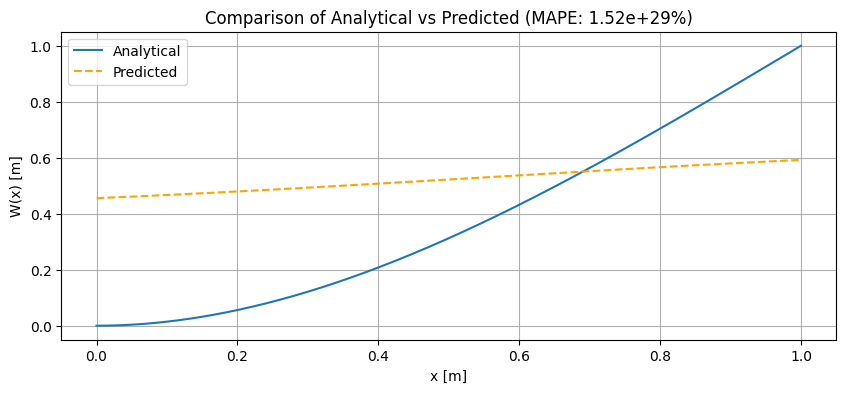

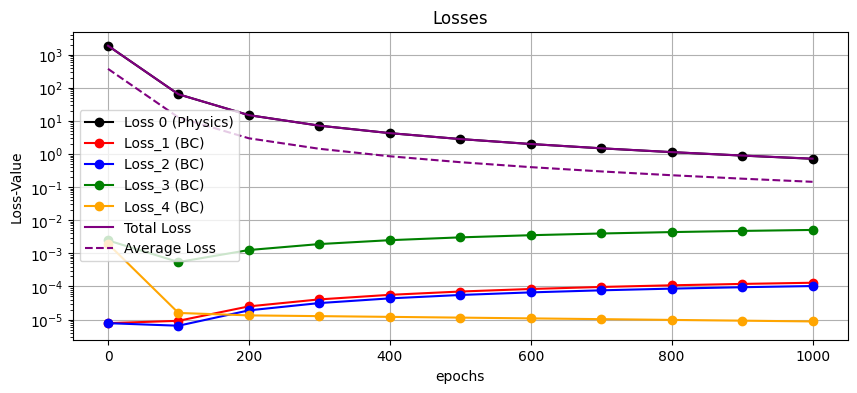

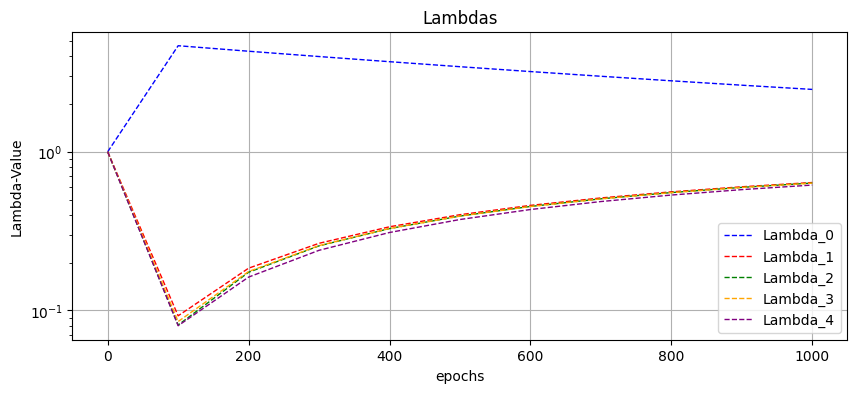

In [5]:
# Plot the results
filename = "./pinn_results"
filename2 = "./pinn_results"
general_utils.plotting(filename, filename2, capture=capture, figsize=(10, 4),
                    plot_comparison=True,
                    plot_losses=True,
                    plot_lambdas=True,
                    plot_losses_comparison=False,
                    plot_lambdas_comparison=False,
                    plot_differences=False)

In [ ]:
# Import the results
filename_load = "./pinn_results"
W, dW_dx, dW_dxx, dW_dxxx, dW_dxxxx, x, w_analytic, lambdas, losses = general_utils.load_results(filename_load)